In [1]:
%reload_ext autoreload
%autoreload 2

from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
    custom_plots,
    compress_repeated_epochs
)
from ripple_heterogeneity.readout import assembly_multi_region, assembly_multi_region_member_ratemap_corr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import os
import nelpy as nel
from statannot import add_stat_annotation
from statannotations.Annotator import Annotator
import glob
import pickle
import itertools
from ripple_heterogeneity.place_cells import maps
from scipy import stats

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## locate sessions that were ran with assembly_multi_region

In [2]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_50ms_dt_10ms_z_dt_v2"
sessions = glob.glob(save_path + os.sep + "*.pkl")
sessions_df = pd.DataFrame()
sessions_df["basepath"] = sessions

In [3]:
sessions_df

,basepath
0,Z:\home\ryanh\projects\ripple_heterogeneity\as...
1,Z:\home\ryanh\projects\ripple_heterogeneity\as...
2,Z:\home\ryanh\projects\ripple_heterogeneity\as...
3,Z:\home\ryanh\projects\ripple_heterogeneity\as...
4,Z:\home\ryanh\projects\ripple_heterogeneity\as...
...,...
120,Z:\home\ryanh\projects\ripple_heterogeneity\as...
121,Z:\home\ryanh\projects\ripple_heterogeneity\as...
122,Z:\home\ryanh\projects\ripple_heterogeneity\as...
123,Z:\home\ryanh\projects\ripple_heterogeneity\as...


In [ ]:
# assembly_multi_region_member_ratemap_corr.run(
#     r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_50ms_dt_10ms_z_dt\Z__Data_Kenji_ec014.427_456.pkl"
# )


In [6]:
save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\assembly_multi_region_member_ratemap_corr_v4"

batch_analysis.run(
    sessions_df,
    save_path,
    assembly_multi_region_member_ratemap_corr.run,
    parallel=True,
    skip_if_error=False,
    verbose=False,
)

label_df = assembly_multi_region_member_ratemap_corr.load_results(save_path)

100%|██████████| 243/243 [00:24<00:00,  9.92it/s]


In [7]:
label_df["cross_label"] = label_df.deepSuperficial_ref + "_" + label_df.brainRegion_tar
label_df.loc[(label_df.is_member_sig_ref == True) & (label_df.is_member_sig_tar == True), "ismembers"] = "members"
label_df.loc[(label_df.is_member_sig_ref == False) | (label_df.is_member_sig_tar == False), "ismembers"] = "nonmembers"

label_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
0,19.0,0.0,20.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,4.478010,2.856539,5.797472,5.439572,977.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
1,20.0,0.0,21.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,2.296279,2.856539,4.559495,5.439572,2184.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
2,21.0,0.0,23.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,39.625545,2.856539,0.935659,5.439572,243.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
3,22.0,0.0,25.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,6.664227,2.856539,3.157277,5.439572,761.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
4,23.0,0.0,26.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,9.619549,2.856539,2.178459,5.439572,787.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496737,231.0,273.0,299.0,375.0,CA1,MEC,Superficial,unknown,False,False,...,2.261327,2.284448,2.615079,12.812079,8.183346,2946.0,3651.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers
3496738,231.0,274.0,299.0,380.0,CA1,MEC,Superficial,unknown,False,False,...,2.491842,2.284448,3.685653,12.812079,10.367901,2946.0,3076.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers
3496739,231.0,275.0,299.0,381.0,CA1,MEC,Superficial,unknown,False,False,...,2.164970,2.284448,0.544154,12.812079,52.532365,2946.0,18917.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers
3496740,231.0,276.0,299.0,382.0,CA1,MEC,Superficial,unknown,False,False,...,2.955754,2.284448,9.370869,12.812079,5.800705,2946.0,659.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers


In [ ]:
label_df.query("ismembers=='members'").basepath.value_counts()

In [9]:
label_df.keys()

Index(['idx_ref', 'idx_tar', 'UID_ref', 'UID_tar', 'brainRegion_ref',
       'brainRegion_tar', 'deepSuperficial_ref', 'deepSuperficial_tar',
       'is_member_sig_ref', 'is_member_sig_tar', 'assembly_n', 'spatial_corr',
       'spatial_info_ref', 'spatial_info_tar', 'spatial_sparsity_ref',
       'spatial_sparsity_tar', 'peak_rate_ref', 'peak_rate_tar',
       'n_spikes_ref', 'n_spikes_tar', 'basepath', 'cross_label', 'ismembers'],
      dtype='object')

<AxesSubplot:xlabel='peak_rate_ref', ylabel='spatial_info_ref'>

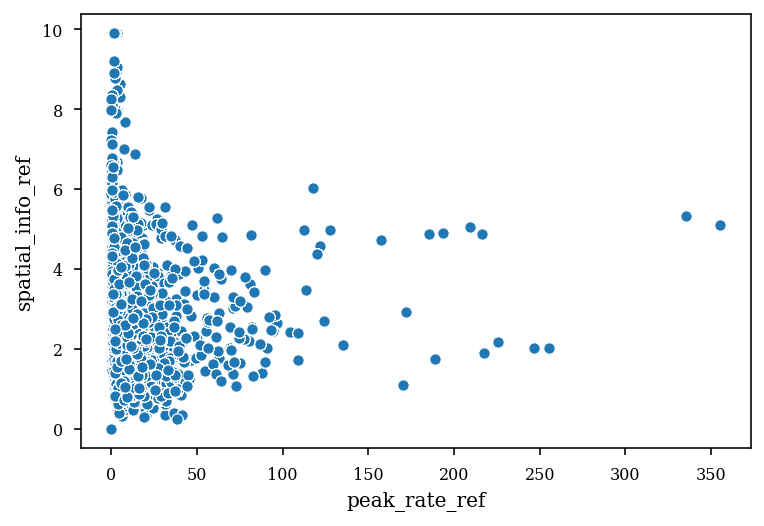

In [10]:
sns.scatterplot(data=label_df, x="peak_rate_ref",y="spatial_info_ref")

In [11]:
label_df.query("ismembers == 'members' & cross_label == 'Superficial_MEC' & n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2").head(10)

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
94269,6.0,4.0,51.0,30.0,CA1,MEC,Superficial,unknown,True,True,...,3.009915,5.775169,5.527637,6.727932,7.090271,1529.0,1579.0,Z:\Data\Kenji\ec013.451_470,Superficial_MEC,members
103908,48.0,52.0,72.0,101.0,CA1,MEC,Superficial,unknown,True,True,...,0.384644,0.256474,0.420361,20.109009,11.054615,13009.0,5148.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
103917,48.0,61.0,72.0,111.0,CA1,MEC,Superficial,unknown,True,True,...,0.438069,0.256474,0.563398,20.109009,6.435479,13009.0,4637.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
103920,48.0,64.0,72.0,114.0,CA1,MEC,Superficial,unknown,True,True,...,0.904617,0.256474,3.575986,20.109009,2.521163,13009.0,476.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
103952,48.0,96.0,72.0,149.0,CA1,MEC,Superficial,unknown,True,True,...,1.033590,0.256474,3.293249,20.109009,3.622947,13009.0,637.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
103953,48.0,97.0,72.0,151.0,CA1,MEC,Superficial,unknown,True,True,...,0.688407,0.256474,2.333315,20.109009,3.292318,13009.0,1062.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
103973,48.0,117.0,72.0,176.0,CA1,MEC,Superficial,unknown,True,True,...,0.797792,0.256474,1.534032,20.109009,4.255509,13009.0,1957.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
165284,4.0,2.0,60.0,18.0,CA1,MEC,Superficial,unknown,True,True,...,0.764330,0.070985,0.250668,36.318286,32.471146,38528.0,10852.0,Z:\Data\Kenji\ec013.839_851,Superficial_MEC,members
165285,5.0,2.0,63.0,18.0,CA1,MEC,Superficial,unknown,True,True,...,0.764330,7.425621,0.250668,3.215269,32.471146,378.0,10852.0,Z:\Data\Kenji\ec013.839_851,Superficial_MEC,members
225571,14.0,2.0,93.0,28.0,CA1,MEC,Superficial,unknown,True,True,...,0.746376,2.233047,0.697622,5.221756,9.642005,1988.0,6385.0,Z:\Data\Kenji\ec013.752_769,Superficial_MEC,members


In [12]:
basepath = "Z:\Data\AYAold\AYA9\day12"
label_df.query("basepath == @basepath & ismembers == 'members'")[["UID_ref","UID_tar","ismembers","assembly_n"]]

,UID_ref,UID_tar,ismembers,assembly_n
103434,57.0,101.0,members,2.0
103443,57.0,111.0,members,2.0
103446,57.0,114.0,members,2.0
103453,57.0,122.0,members,2.0
103478,57.0,149.0,members,2.0
...,...,...,...,...
1933903,43.0,173.0,members,5.0
1934219,48.0,173.0,members,5.0
1934377,57.0,173.0,members,5.0
1934535,62.0,173.0,members,5.0


In [14]:
basepath = "Z:\Data\AYAold\AYA9\day12"
current_members_df = label_df[(label_df.basepath == basepath) & (label_df.ismembers == 'members')]
current_nonmembers_df = label_df[(label_df.basepath == basepath) & (label_df.ismembers == 'nonmembers')]

idx = (np.in1d(current_nonmembers_df.idx_ref,current_members_df.idx_ref) & np.in1d(current_nonmembers_df.idx_tar,current_members_df.idx_tar))

current_nonmembers_df.loc[idx,"spatial_corr"] = np.nan

label_df.loc[(label_df.basepath == basepath) & (label_df.ismembers == 'nonmembers'),"spatial_corr"] = current_nonmembers_df.spatial_corr.values

In [16]:
current_members_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
103434,37.0,52.0,57.0,101.0,CA1,MEC,Deep,unknown,True,True,...,0.384644,4.912944,0.420361,7.026404,11.054615,671.0,5148.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
103443,37.0,61.0,57.0,111.0,CA1,MEC,Deep,unknown,True,True,...,0.438069,4.912944,0.563398,7.026404,6.435479,671.0,4637.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
103446,37.0,64.0,57.0,114.0,CA1,MEC,Deep,unknown,True,True,...,0.904617,4.912944,3.575986,7.026404,2.521163,671.0,476.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
103453,37.0,71.0,57.0,122.0,CA1,MEC,Deep,unknown,True,True,...,3.043711,4.912944,36.223220,7.026404,1.616328,671.0,53.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
103478,37.0,96.0,57.0,149.0,CA1,MEC,Deep,unknown,True,True,...,1.033590,4.912944,3.293249,7.026404,3.622947,671.0,637.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933903,29.0,115.0,43.0,173.0,CA1,MEC,Superficial,unknown,True,True,...,2.537727,6.727141,20.801239,2.311604,1.504753,319.0,123.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
1934219,33.0,115.0,48.0,173.0,CA1,MEC,Superficial,unknown,True,True,...,2.537727,0.437664,20.801239,11.959039,1.504753,5277.0,123.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members
1934377,37.0,115.0,57.0,173.0,CA1,MEC,Deep,unknown,True,True,...,2.537727,4.136731,20.801239,3.795340,1.504753,671.0,123.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,members
1934535,42.0,115.0,62.0,173.0,CA1,MEC,Superficial,unknown,True,True,...,2.537727,12.051416,20.801239,1.858084,1.504753,420.0,123.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,members


In [17]:
current_nonmembers_df.spatial_corr.unique()

array([0.13672243, 0.02524034, 0.1551052 , ..., 0.04389102, 0.02397996,
       0.12620826])

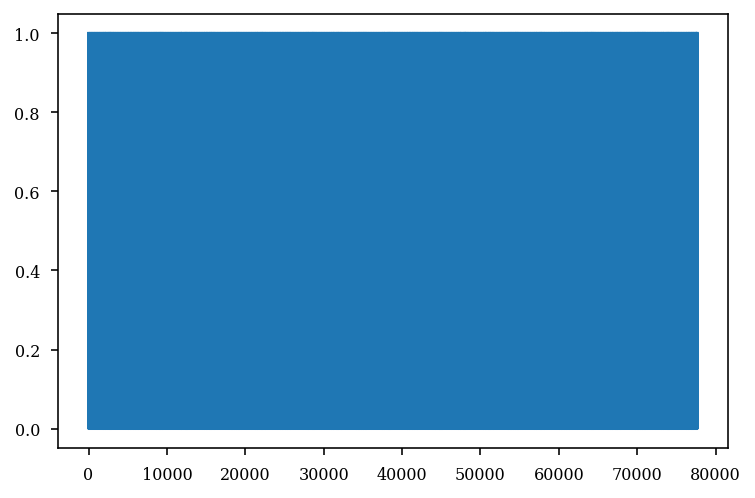

In [18]:
current_nonmembers_df
plt.plot(np.in1d(current_nonmembers_df.spatial_corr,current_nonmembers_df.spatial_corr.unique()))

In [19]:

current_nonmembers_df[np.isnan(current_nonmembers_df.spatial_corr)]

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
94364,0.0,67.0,1.0,118.0,CA1,MEC,Deep,unknown,False,False,...,9.610280e-16,0.376635,NaN,16.536834,0.000000,8820.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
94370,0.0,73.0,1.0,124.0,CA1,MEC,Deep,unknown,False,False,...,9.610280e-16,0.376635,NaN,16.536834,0.000000,8820.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
94418,0.0,121.0,1.0,183.0,CA1,MEC,Deep,unknown,False,False,...,9.610280e-16,0.376635,NaN,16.536834,0.000000,8820.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
94443,1.0,67.0,2.0,118.0,CA1,MEC,Deep,unknown,False,False,...,9.610280e-16,16.365976,NaN,2.073049,0.000000,137.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
94449,1.0,73.0,2.0,124.0,CA1,MEC,Deep,unknown,False,False,...,9.610280e-16,16.365976,NaN,2.073049,0.000000,137.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954287,48.0,117.0,72.0,176.0,CA1,MEC,Superficial,unknown,False,False,...,9.213438e-01,0.207560,1.699767,18.978057,3.987487,13009.0,1957.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,nonmembers
1954291,48.0,121.0,72.0,183.0,CA1,MEC,Superficial,unknown,False,False,...,3.203427e-16,0.207560,NaN,18.978057,0.000000,13009.0,0.0,Z:\Data\AYAold\AYA9\day12,Superficial_MEC,nonmembers
1954316,49.0,67.0,73.0,118.0,CA1,MEC,Deep,unknown,False,False,...,3.203427e-16,120.500733,NaN,1.003146,0.000000,12.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers
1954322,49.0,73.0,73.0,124.0,CA1,MEC,Deep,unknown,False,False,...,3.203427e-16,120.500733,NaN,1.003146,0.000000,12.0,0.0,Z:\Data\AYAold\AYA9\day12,Deep_MEC,nonmembers


## remove non members correlations if the pair was members in another assembly

In [20]:
for basepath in label_df.basepath.unique():
    current_members_df = label_df[
        (label_df.basepath == basepath) & (label_df.ismembers == "members")
    ]
    current_nonmembers_df = label_df[
        (label_df.basepath == basepath) & (label_df.ismembers == "nonmembers")
    ]
    # locate the index of members pairs within other assemblies in which they were not members
    idx = np.in1d(current_nonmembers_df.idx_ref, current_members_df.idx_ref) & np.in1d(
        current_nonmembers_df.idx_tar, current_members_df.idx_tar
    )
    current_nonmembers_df.loc[idx, "spatial_corr"] = np.nan

    label_df.loc[
        (label_df.basepath == basepath) & (label_df.ismembers == "nonmembers"),
        "spatial_corr",
    ] = current_nonmembers_df.spatial_corr.values


In [21]:
test_df = label_df.query("ismembers=='members'")[["basepath","UID_ref","UID_tar","assembly_n","ismembers"]].value_counts().reset_index().sort_values(["basepath","assembly_n"])
test_df
# test_df.query("basepath == 'Z:\Data\FujisawaS\EE\EE0705fm'")

 95%|█████████▌| 119/125 [07:56<00:24,  4.01s/it]


,basepath,UID_ref,UID_tar,assembly_n,ismembers,0
558,Z:\Data\AYAold\AYA10\day12,25.0,145.0,3.0,members,1
569,Z:\Data\AYAold\AYA10\day12,25.0,107.0,3.0,members,1
551,Z:\Data\AYAold\AYA10\day12,45.0,168.0,14.0,members,1
552,Z:\Data\AYAold\AYA10\day12,50.0,168.0,14.0,members,1
553,Z:\Data\AYAold\AYA10\day12,50.0,163.0,14.0,members,1
...,...,...,...,...,...,...
179,Z:\Data\ORproject\OR18\day2,33.0,15.0,0.0,members,2
180,Z:\Data\ORproject\OR18\day2,26.0,15.0,0.0,members,2
175,Z:\Data\ORproject\OR18\day3,58.0,8.0,4.0,members,2
176,Z:\Data\ORproject\OR18\day3,54.0,8.0,4.0,members,2


In [22]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & ismembers == 'nonmembers'"

label_df.query(idx)

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
0,19.0,0.0,20.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,4.478010,2.856539,5.797472,5.439572,977.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
1,20.0,0.0,21.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,2.296279,2.856539,4.559495,5.439572,2184.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
3,22.0,0.0,25.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,6.664227,2.856539,3.157277,5.439572,761.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
4,23.0,0.0,26.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,9.619549,2.856539,2.178459,5.439572,787.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
6,26.0,0.0,29.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,0.654807,2.856539,12.305772,5.439572,7174.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496737,231.0,273.0,299.0,375.0,CA1,MEC,Superficial,unknown,False,False,...,2.261327,2.284448,2.615079,12.812079,8.183346,2946.0,3651.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers
3496738,231.0,274.0,299.0,380.0,CA1,MEC,Superficial,unknown,False,False,...,2.491842,2.284448,3.685653,12.812079,10.367901,2946.0,3076.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers
3496739,231.0,275.0,299.0,381.0,CA1,MEC,Superficial,unknown,False,False,...,2.164970,2.284448,0.544154,12.812079,52.532365,2946.0,18917.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers
3496740,231.0,276.0,299.0,382.0,CA1,MEC,Superficial,unknown,False,False,...,2.955754,2.284448,9.370869,12.812079,5.800705,2946.0,659.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers


In [23]:
label_df

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
0,19.0,0.0,20.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,4.478010,2.856539,5.797472,5.439572,977.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
1,20.0,0.0,21.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,2.296279,2.856539,4.559495,5.439572,2184.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
2,21.0,0.0,23.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,39.625545,2.856539,0.935659,5.439572,243.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
3,22.0,0.0,25.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,6.664227,2.856539,3.157277,5.439572,761.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
4,23.0,0.0,26.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,9.619549,2.856539,2.178459,5.439572,787.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496737,231.0,273.0,299.0,375.0,CA1,MEC,Superficial,unknown,False,False,...,2.261327,2.284448,2.615079,12.812079,8.183346,2946.0,3651.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers
3496738,231.0,274.0,299.0,380.0,CA1,MEC,Superficial,unknown,False,False,...,2.491842,2.284448,3.685653,12.812079,10.367901,2946.0,3076.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers
3496739,231.0,275.0,299.0,381.0,CA1,MEC,Superficial,unknown,False,False,...,2.164970,2.284448,0.544154,12.812079,52.532365,2946.0,18917.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers
3496740,231.0,276.0,299.0,382.0,CA1,MEC,Superficial,unknown,False,False,...,2.955754,2.284448,9.370869,12.812079,5.800705,2946.0,659.0,Z:\Data\HMC1\day10,Superficial_MEC,nonmembers


In [24]:
label_df.drop_duplicates(subset=["spatial_corr"])

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
0,19.0,0.0,20.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,4.478010,2.856539,5.797472,5.439572,977.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
1,20.0,0.0,21.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,2.296279,2.856539,4.559495,5.439572,2184.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
2,21.0,0.0,23.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,39.625545,2.856539,0.935659,5.439572,243.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
5,25.0,0.0,28.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,9.330685,2.856539,1.730324,5.439572,614.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
6,26.0,0.0,29.0,1.0,CA1,PFC,Deep,unknown,False,False,...,1.506231,0.654807,2.856539,12.305772,5.439572,7174.0,2033.0,Z:\Data\FujisawaS\GG\GG0401,Deep_PFC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438169,155.0,66.0,213.0,88.0,CA1,PFC,Deep,unknown,True,True,...,3.494674,3015.616096,21.906136,0.061807,1.746530,19.0,581.0,Z:\Data\HMC1\day10,Deep_PFC,members
3438185,174.0,66.0,233.0,88.0,CA1,PFC,Deep,unknown,True,True,...,3.494674,47.165385,21.906136,0.863607,1.746530,144.0,581.0,Z:\Data\HMC1\day10,Deep_PFC,members
3438186,175.0,66.0,234.0,88.0,CA1,PFC,Superficial,unknown,True,True,...,3.494674,5.190099,21.906136,4.829170,1.746530,1553.0,581.0,Z:\Data\HMC1\day10,Superficial_PFC,members
3438201,194.0,66.0,260.0,88.0,CA1,PFC,Superficial,unknown,True,True,...,3.494674,37.734964,21.906136,0.956613,1.746530,204.0,581.0,Z:\Data\HMC1\day10,Superficial_PFC,members


In [25]:
label_df.ismembers.value_counts()


nonmembers    3495626
members          1116
Name: ismembers, dtype: int64

In [26]:
label_df.drop_duplicates(subset=["idx_ref","idx_tar","spatial_corr"]).ismembers.value_counts()


nonmembers    213159
members         1105
Name: ismembers, dtype: int64

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Superficial_PFC_nonmembers vs. Superficial_PFC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:1.807e-05 U_stat=2.563e+06
Deep_PFC_nonmembers vs. Deep_PFC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:3.722e-04 U_stat=9.291e+06
Deep_MEC_nonmembers vs. Deep_MEC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:2.026e-03 U_stat=2.402e+06
Superficial_MEC_nonmembers vs. Superficial_MEC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:9.703e-01 U_stat=8.767e+05
Deep_MEC_members vs. Superficial_MEC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:2.206e-01 U_stat=1.090e+04
Deep_PFC_members vs. Superficial_PFC_members: Mann-Whitney-Wilcoxon test two-sided, P_val:2.996e-01 U_stat=3.255e+04


(<AxesSubplot:xlabel='cross_label', ylabel='spatial_corr'>,
  <statannotations.Annotation.Annotation at 0x12410301250>])

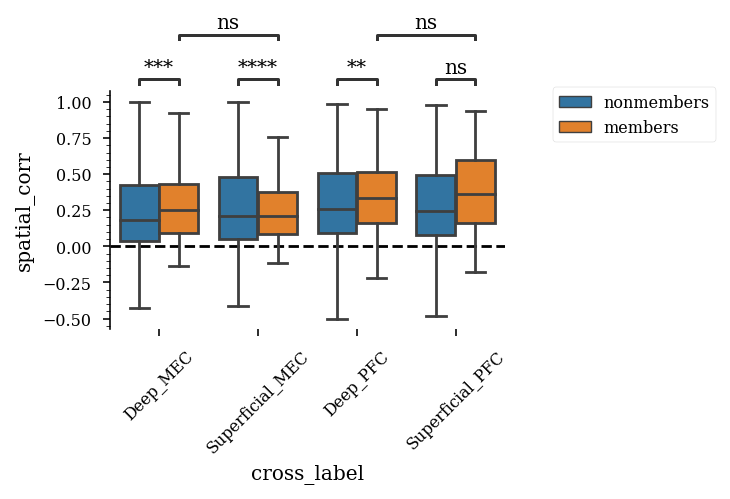

In [27]:
fig = plt.figure(
    figsize=functions.set_size("thesis", fraction=.6, subplots=(1, 1)), edgecolor=None
)
# drop duplicates
label_df_subset = label_df.drop_duplicates(subset=["idx_ref","idx_tar","spatial_corr"])

idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2"
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="cross_label",
    order=["Deep_MEC", "Superficial_MEC", "Deep_PFC", "Superficial_PFC"],
    hue="ismembers",
    showfliers=False,
)
# sns.stripplot(data=label_df.query(idx),y="spatial_corr",x="cross_label",hue="ismembers",dodge=True,color="k",size=5)
sns.despine(bottom=True)
plt.gca().yaxis.set_minor_locator(AutoMinorLocator())
plt.axhline(0, color="k", linestyle="--", zorder=-1000)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=45)

box_pairs = [
    (("Deep_MEC", "members"), ("Deep_MEC", "nonmembers")),
    (("Superficial_MEC", "members"), ("Superficial_MEC", "nonmembers")),
    (("Superficial_PFC", "members"), ("Superficial_PFC", "nonmembers")),
    (("Deep_PFC", "members"), ("Deep_PFC", "nonmembers")),
    (("Deep_MEC", "members"), ("Superficial_MEC", "members")),
    (("Deep_PFC", "members"), ("Superficial_PFC", "members")),

]
annotator = Annotator(
    plt.gca(),
    box_pairs,
    data=label_df_subset.query(idx),
    x="cross_label",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

# plt.savefig(
#     os.path.join(fig_save_path, "ratemap_corr_cross_region_assemblies.svg"),
#     dpi=300,
#     bbox_inches="tight",
# )

In [28]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Deep_MEC'"
label_df_subset.query(idx)

,idx_ref,idx_tar,UID_ref,UID_tar,brainRegion_ref,brainRegion_tar,deepSuperficial_ref,deepSuperficial_tar,is_member_sig_ref,is_member_sig_tar,...,spatial_info_tar,spatial_sparsity_ref,spatial_sparsity_tar,peak_rate_ref,peak_rate_tar,n_spikes_ref,n_spikes_tar,basepath,cross_label,ismembers
9529,7.0,53.0,14.0,202.0,CA1,MEC,Deep,unknown,False,False,...,5.185953,86.000000,31.463415,3.207792,4.813936,1343.0,3750.0,Z:\Data\AYAold\AYA9\day20,Deep_MEC,nonmembers
9532,7.0,56.0,14.0,206.0,CA1,MEC,Deep,unknown,False,False,...,4.684876,86.000000,39.581590,3.207792,2.247410,1343.0,6427.0,Z:\Data\AYAold\AYA9\day20,Deep_MEC,nonmembers
9533,7.0,57.0,14.0,210.0,CA1,MEC,Deep,unknown,False,False,...,5.673498,86.000000,51.600000,3.207792,3.111340,1343.0,5354.0,Z:\Data\AYAold\AYA9\day20,Deep_MEC,nonmembers
9535,7.0,59.0,14.0,214.0,CA1,MEC,Deep,unknown,False,False,...,3.174010,86.000000,4.539589,3.207792,9.331811,1343.0,17327.0,Z:\Data\AYAold\AYA9\day20,Deep_MEC,nonmembers
9539,7.0,63.0,14.0,222.0,CA1,MEC,Deep,unknown,False,False,...,2.965461,86.000000,5.504979,3.207792,8.361207,1343.0,11513.0,Z:\Data\AYAold\AYA9\day20,Deep_MEC,nonmembers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3231482,229.0,277.0,297.0,383.0,CA1,MEC,Deep,unknown,False,False,...,2.061480,0.764468,2.042029,28.442468,7.331916,15045.0,4378.0,Z:\Data\HMC1\day10,Deep_MEC,nonmembers
3268465,204.0,253.0,270.0,334.0,CA1,MEC,Deep,unknown,True,True,...,3.284810,2.780635,3.112952,48.114843,31.841380,4130.0,2192.0,Z:\Data\HMC1\day10,Deep_MEC,members
3380438,158.0,239.0,216.0,307.0,CA1,MEC,Deep,unknown,True,True,...,2.970109,12.238625,2.702534,7.925997,35.104330,1766.0,4794.0,Z:\Data\HMC1\day10,Deep_MEC,members
3406625,182.0,252.0,244.0,333.0,CA1,MEC,Deep,unknown,True,True,...,3.309338,2.458810,1.695403,33.325049,23.862540,3188.0,2816.0,Z:\Data\HMC1\day10,Deep_MEC,members


C:\Users\Cornell\AppData\Local\Temp\ipykernel_12228\2540577573.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_nonmembers vs. 1_members: Mann-Whitney-Wilcoxon test two-sided, P_val:2.026e-03 U_stat=2.402e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_nonmembers vs. 1_members: Mann-Whitney-Wilcoxon test two-sided, P_val:9.703e-01 U_stat=8.767e+05
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

1_nonmembers vs. 1_members: Mann-Whitney-Wilcoxon test two-sided, P_val:3.722e-04 U_stat=9.291e+06
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    

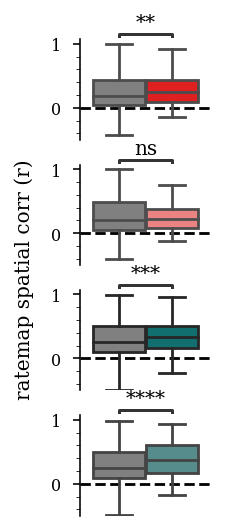

In [31]:
fig, axs = plt.subplots(4,1, figsize=functions.set_size('thesis', fraction=.2, subplots=(6, 1)), edgecolor=None, sharey=True)
fig.subplots_adjust(hspace = 0.25, wspace=.1)
axs = axs.ravel()

# drop duplicates
label_df_subset = label_df.drop_duplicates(subset=["idx_ref","idx_tar","spatial_corr"])
label_df_subset["constant"] = 1

idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Deep_MEC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#de2020",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    hue_order=group_colors.keys(),
    showfliers=False,
    saturation=1,
    ax=axs[0]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[0],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()


idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Superficial_MEC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#eb8383",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    showfliers=False,
    saturation=1,
    ax=axs[1]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[1],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()


idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Deep_PFC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#116f70",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    showfliers=False,
    saturation=1,
    ax=axs[2]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[2],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()


idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & cross_label == 'Superficial_PFC'"
group_colors = {
    "nonmembers":"#808080",
    "members": "#568c8c",
}
sns.set_palette(sns.color_palette(group_colors.values()))
sns.boxplot(
    data=label_df_subset.query(idx),
    y="spatial_corr",
    x="constant",
    hue="ismembers",
    showfliers=False,
    saturation=1,
    ax=axs[3]
)
box_pairs = [
    ((1, "members"), (1, "nonmembers")),
]
annotator = Annotator(
    axs[3],
    box_pairs,
    data=label_df_subset.query(idx),
    x="constant",
    y="spatial_corr",
    hue="ismembers",
)
annotator.configure(
    test="Mann-Whitney",
    text_format="star",
    loc="outside",
    comparisons_correction=None,
    verbose=1,
)
annotator.apply_and_annotate()

for i in range(4):
    axs[i].legend("",frameon=False)
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    axs[i].yaxis.set_minor_locator(AutoMinorLocator())
    axs[i].axhline(0, color="k", linestyle="--", zorder=-1000)
    axs[i].axes.get_xaxis().set_ticks([])

fig.text(-0.2, 0.5, 'ratemap spatial corr (r)', ha='center', va='center', rotation='vertical')

sns.despine(bottom=True)

# plt.savefig(
#     os.path.join(fig_save_path, "ratemap_corr_cross_region_assemblies_v2.svg"),
#     dpi=300,
#     bbox_inches="tight",
# )

In [38]:
label_df_subset = functions.add_animal_id(label_df_subset)
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2"

label_df_subset.query(idx).animal_id.nunique()

d:\github\ripple_heterogeneity\ripple_heterogeneity\utils\functions.py:1356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


13

In [43]:
label_df_subset.query(idx).shape

(138998, 25)

In [86]:
# group_colors = {
#     "Deep_MEC_members": "#de2020",
#     "Deep_MEC_nonmembers": "#de2020",

#     "Superficial_MEC": "#eb8383",
#     "Deep_PFC": "#116f70",
#     "Superficial_PFC": "#568c8c",
# }

# label_df["cross_region_member_label"] = label_df.cross_label + "_" + label_df.ismembers
# label_df["constant"] = 1
# idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2"

# sns.boxplot(data=label_df.query(idx),y="spatial_corr",x="constant",hue="cross_region_member_label")
# plt.legend(bbox_to_anchor=(1.1, 1.05))


<AxesSubplot:xlabel='cross_label', ylabel='spatial_corr'>

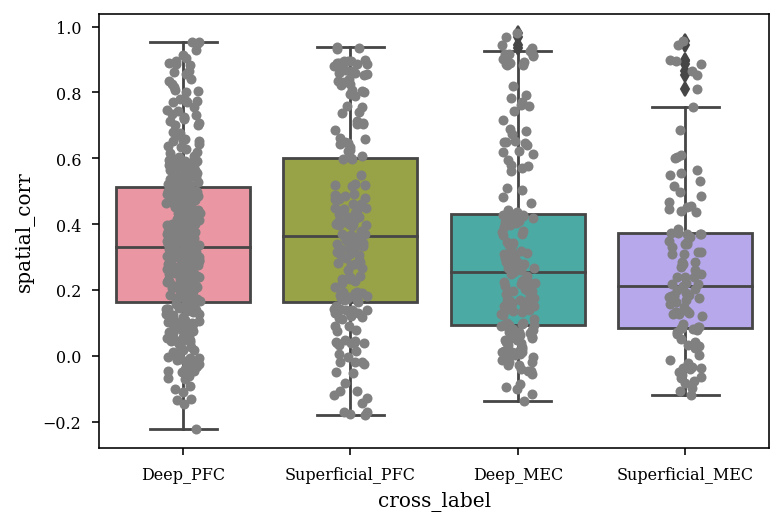

In [32]:
idx = "n_spikes_ref > 100 & n_spikes_tar > 100 & peak_rate_ref > 2 & peak_rate_tar > 2 & ismembers=='members'"

sns.boxplot(data=label_df.query(idx),y="spatial_corr",x="cross_label")
sns.stripplot(data=label_df.query(idx),y="spatial_corr",x="cross_label")
